In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# Importing Dataset

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x = df.iloc[:,1:]
x.head() # Removing Id column

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Encoding 

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Gender'] = le.fit_transform(x['Gender'])
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Finding Optimal Number Of Clusters using WCSS

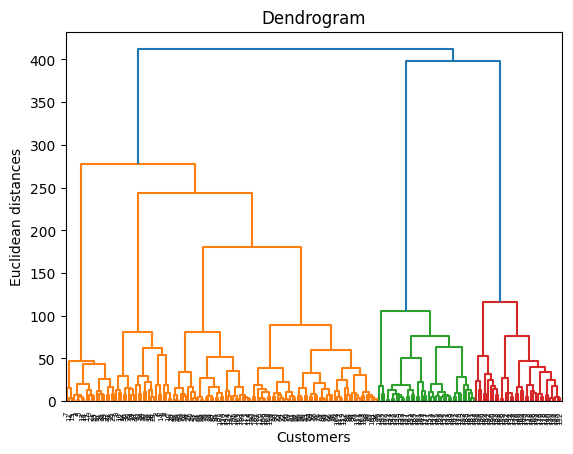

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

# Checking the Purity of clusters using Silhouette Score

In [7]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x, y_hc)
print("Silhouette Score:", round(score*100,4),"%") # The Silhouette Score measures how well data points fit within their clusters. It compares the average distance to points in the same cluster (cohesion) with the average distance to points in the nearest cluster (separation). Values range from -1 (poor) to 1 (ideal clustering).

Silhouette Score: 44.2801 %
